# Co-Training 2-View Semi-Supervised Regression

This tutorial demonstrates co-training regression on a semi-supervised regression task. The data only has targets for 20% of its samples, and although it does not have multiple views, co-training regression can still be beneficial. In order to get this benefit, the CTRegressor object is initialized with 2 different types of KNeighborsRegressors (in this case, the power parameter for the Minkowski metric is different in each view). Then, the single view of data (X) is passed in twice as if it shows two different views. The MSE of the predictions on test data from the resulting CTRegressor is compared to the MSE from using each of the individual KNeighborsRegressor objects after fitting on the labeled samples of the training data. The MSE shows that the CTRegressor does better than using either KNeighborsRegressor alone in this semi-supervised case.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
%matplotlib inline
from mvlearn.semi_supervised import CTRegressor

C:\Users\Gaurav Singhal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generating 3D Mexican Hat Data

In [2]:
N_samples = 3750
N_test = 1250
labeled_portion = .2

seed = 42
np.random.seed(seed)

# Generating the 3D Mexican Hat data
X = np.random.uniform(-4*np.pi, 4*np.pi, size=(N_samples,2))
y = ((np.sin(np.linalg.norm(X, axis=1)))/np.linalg.norm(X, axis=1)).squeeze()
X_test = np.random.uniform(-4*np.pi, 4*np.pi, size=(N_test,2))
y_test = ((np.sin(np.linalg.norm(X_test, axis=1)))/np.linalg.norm(X_test, axis=1)).squeeze()

y_train = y.copy()
np.random.seed(1)

# Randomly selecting the index which are to be made nan
selector = np.random.uniform(size=(N_samples,))
selector[selector > labeled_portion] = np.nan
y_train[np.isnan(selector)] = np.nan
lab_samples = ~np.isnan(y_train)

# Indexes which are not null
not_null = [i for i in range(len(y_train)) if not np.isnan(y_train[i])]

# Visualization of Data

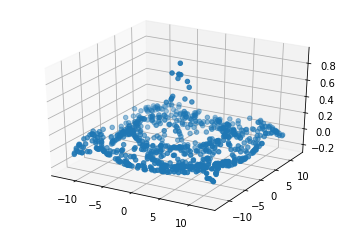

In [3]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = y[lab_samples]
x_points = X[lab_samples, 0]
y_points = X[lab_samples, 1]
ax.scatter3D(x_points, y_points, z_points)
plt.show()

# Co-Training on 2 views vs Single view training

Here, we are using the KNeighborsRegressor as the estimators for regression.
We are using the default value for all the parameters except the p value in order to make the estimators independent.
The same p values are used for training the corresponding single view model.

In [4]:
############## Single view semi-supervised learning ##############
#-----------------------------------------------------------------

knn1 = KNeighborsRegressor(p = 2)
knn2 = KNeighborsRegressor(p = 5)

# Train on only the examples with labels
knn1.fit(X[not_null], y[not_null])
pred1 = knn1.predict(X_test)
error1 = mean_squared_error(y_test, pred1)

knn2.fit(X[not_null], y[not_null])
pred2 = knn2.predict(X_test)
error2 = mean_squared_error(y_test, pred2)

print("MSE of single view with knn1 {}\n".format(error1))
print("MSE of single view with knn2 {}\n".format(error2))

######### Multi-view co-training semi-supervised learning #########
#------------------------------------------------------------------

estimator1 = KNeighborsRegressor(p = 2)
estimator2 = KNeighborsRegressor(p = 5)
knn = CTRegressor(estimator1, estimator2, random_state = 26)

# Train a CTClassifier on all the labeled and unlabeled training data
knn.fit([X, X], y_train)
pred_multi_view = knn.predict([X_test, X_test])
error_multi_view = mean_squared_error(y_test, pred_multi_view)

print("MSE of cotraining semi supervised regression {}\n".format(error_multi_view))

MSE of single view with knn1 0.0016125954957153382

MSE of single view with knn2 0.001724891163476389

MSE of cotraining semi supervised regression 0.001508364708398609

